In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import beta, binom, nbinom, norm, t, uniform, poisson, gamma, betabinom

# Ex 1

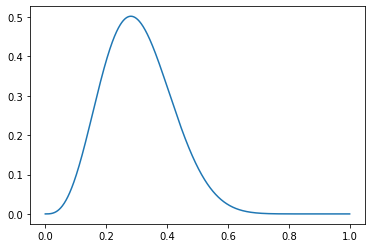

In [2]:
theta = np.linspace(0, 1, 1000)
posterior = beta(a=4, b=4).pdf(theta) * binom(n=10, p=theta).cdf(2)
plt.plot(theta, posterior)
plt.show()

# Ex 2

In [3]:
c1 = 0.4 ** 2
c2 = 0.6 ** 2
p1 = c1 / (c1 + c2)
p2 = c2 / (c1 + c2)
print(1 + p1 * nbinom(n=1, p=0.6).mean() + p2 * nbinom(n=1, p=0.4).mean())

2.2435897435897436


# Ex 3

In [4]:
mean = 1000 / 6
var = 1000 * (1 / 6) * (5 / 6)
norm_approx = norm(loc=mean, scale=np.sqrt(var))
print(norm_approx.ppf(0.05), norm_approx.ppf(0.25), 
      norm_approx.ppf(0.5), norm_approx.ppf(0.75), 
      norm_approx.ppf(0.95))

147.28188077205542 158.71772872992548 166.66666666666666 174.61560460340783 186.0514525612779


# Ex 4

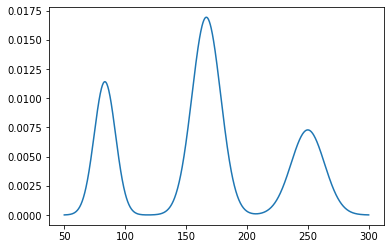

In [5]:
def approximation(prior, theta):
    models = []
    for i, p in enumerate(prior):
        mean = 1000 * theta[i]
        var = 1000 * theta[i] * (1 - theta[i])
        models.append(norm(loc=mean, scale=np.sqrt(var)))
        
    return models

prior = [0.25, 0.5, 0.25]
models = approximation(prior, [1/12, 1/6, 1/4])
prior_predect = lambda y: np.sum([prior[i] * model.pdf(y) for i, model in enumerate(models)], axis=0)
y = np.linspace(50, 300, 1000)
plt.plot(y, prior_predect(y))
plt.show()

# Ex 5

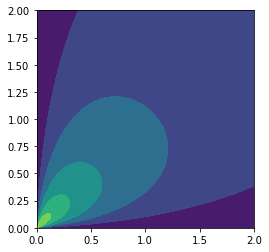

In [6]:
beta_var = lambda a, b: a * b / ((a + b + 1e-100)**2 * (a + b + 1))
a = np.linspace(0, 2, 1000)
b = np.linspace(0, 2, 1000)
aa, bb = np.meshgrid(a, b, sparse=True)
h = plt.contourf(a, b, beta_var(aa, bb))
plt.axis('scaled')
plt.show()

# Ex 10

In [7]:
prior = lambda N: (1 / 100) * ((99 / 100) ** (N - 1))
likelihood = lambda N: (N >= 203) / N
posterior = lambda N: prior(N) * likelihood(N)
N = np.arange(1000000) + 1
prob = posterior(N)
prob = prob / prob.sum()
mean = np.sum(N * prob)
var = np.sum((N**2) * prob) - (mean**2)
print(mean, np.sqrt(var))

279.08851111832587 79.96457540367797


# Ex 11

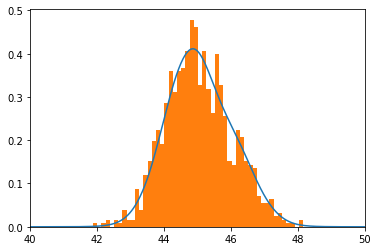

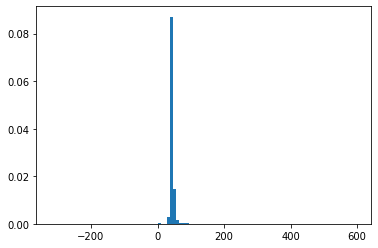

45.25609065918023


In [8]:
prior = lambda theta: (theta >= 0) * (theta <= 100)
model = lambda y, theta: t(df=1, loc=theta).pdf(y)
Y = [43, 44, 45, 46.5, 47.5]
likelihood = lambda theta: np.prod([model(y, theta) for y in Y], axis=0)
posterior = lambda theta: prior(theta) * likelihood(theta)

samples = t(df=1, loc=np.mean(Y)).rvs(100000)
weights = posterior(samples) / t(df=1, loc=np.mean(Y)).pdf(samples)
samples_theta = samples[uniform.rvs(size=100000) <= weights / weights.max()][:1000]

theta = np.linspace(0, 100, 10000)
plt.plot(theta, posterior(theta) / np.mean(posterior(theta)) / 100)
plt.hist(samples_theta, bins=50, density=True)
plt.xlim(40, 50)
plt.show()

samples_y = t(df=1, loc=samples_theta).rvs()
plt.hist(samples_y, bins=100, density=True)
plt.show()

print(samples_y.mean())

# Ex 13

In [9]:
accidents = [24, 25, 31, 31, 22, 21, 26, 20, 16, 22]
deaths = [734, 516, 754, 877, 814, 362, 764, 809, 223, 1066]
rates = [0.19, 0.12, 0.15, 0.16, 0.14, 0.06, 0.13, 0.13, 0.03, 0.15]
def gamma_poisson(y_mean, bins=100):
    samples_theta = gamma(a=10*y_mean, scale=1/10).rvs(100000)
    samples_y = poisson(mu=samples_theta).rvs()
    fig, axs = plt.subplots(1, 2, figsize=[10, 4])
    axs[0].hist(samples_y, bins=bins, density=True)
    a, b = np.quantile(samples_y, [0.025, 0.975])
    axs[0].set_title('[{}, {}]'.format(a, b))

    samples_theta = gamma(a=10*y_mean, scale=1/(5.716e12)).rvs(100000)
    samples_y = poisson(mu=samples_theta * 8e11).rvs()
    axs[1].hist(samples_y, bins=bins, density=True)
    a, b = np.quantile(samples_y, [0.025, 0.975])
    axs[1].set_title('[{}, {}]'.format(a, b))
    plt.show()

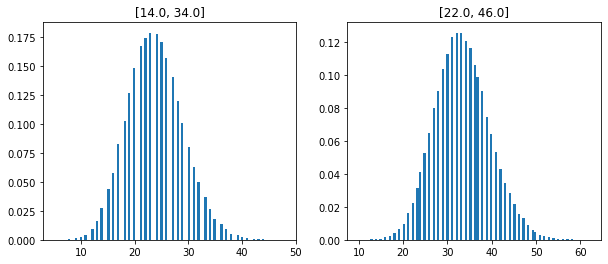

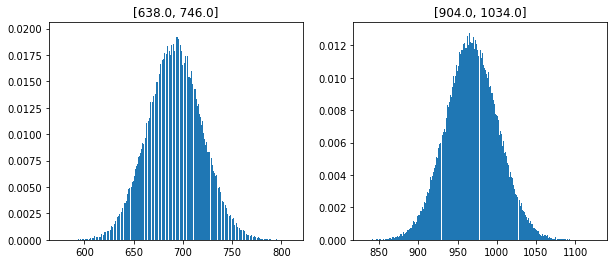

In [10]:
gamma_poisson(np.mean(accidents))
gamma_poisson(np.mean(deaths), bins=300)

# Ex 16

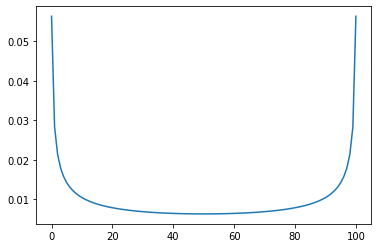

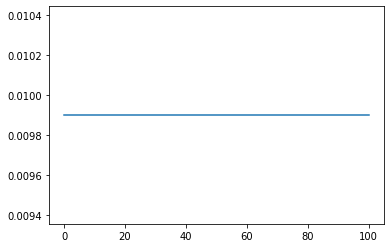

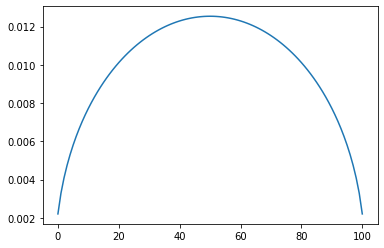

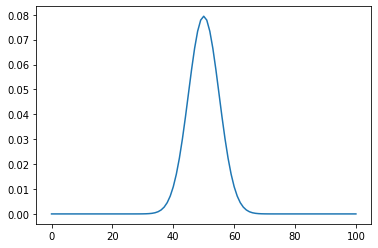

In [11]:
def beta_binom(n, a, b):
    k = np.arange(n + 1)
    plt.plot(k, betabinom.pmf(k, n, a=a, b=b))
    plt.show()

beta_binom(100, 0.5, 0.5)
beta_binom(100, 1, 1)
beta_binom(100, 1.5, 1.5)
beta_binom(100, 10000, 10000)

# Ex 21

In [12]:
polls = pd.read_stata('data/pew_research_center_june_elect_wknd_data.dta')
result = pd.read_csv('data/2008ElectionResult.csv')

states0, counts0 = np.unique(polls.state, return_counts=True)
states1, counts1 = np.unique(polls[polls.ideo == 'very liberal'].state, return_counts=True)
states2 = result.state
states2 = np.array([state.lower() for state in states2])
obama_pct = np.array(result.vote_Obama_pct)

n = np.array([])
y = np.array([])
p = np.array([])
for state in states0:
    if state not in ['alaska', 'hawaii', 'district of columbia', 'washington dc']:
        n = np.append(n, counts0[states0 == state])
        y = np.append(y, counts1[states1 == state])
        p = np.append(p, obama_pct[states2 == state] / 100)

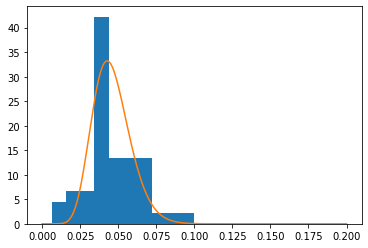

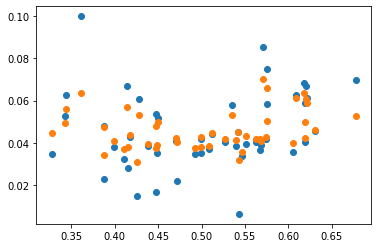

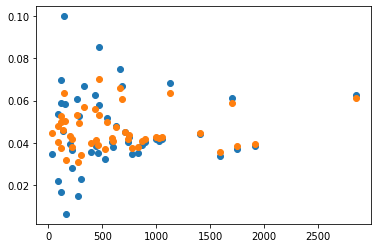

In [13]:
E1 = np.mean(y / n)
E2 = np.mean(1 / n)
Var = np.var(y / n)
ab = (1 - E2) / (Var / (E1 * (1 - E1)) - E2) - 1
a = E1 * ab
b = ab - a

plt.hist(y / n, density=True)
x = np.linspace(0, 0.2, 1000)
plt.plot(x, beta(a=a, b=b).pdf(x))
plt.show()

plt.scatter(p, y / n)
plt.scatter(p, (a + y) / (ab + n))
plt.show()

plt.scatter(n, y / n)
plt.scatter(n, (a + y) / (ab + n))
plt.show()